# 2 - COMPUTER VISION - Canny Edge Detection
    The aim of this program is to mark white lanes on the still image with region masking applied

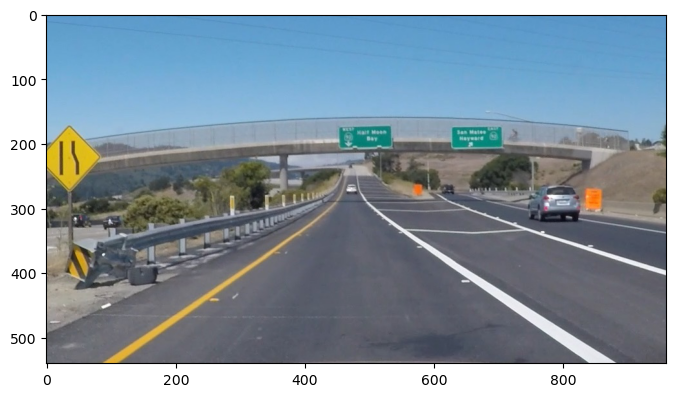

In [1]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image_path = "../../../InputData/Canny/exit-ramp.jpg"

# read the image
image = mpimg.imread(image_path)

plt.figure(figsize=(8,6), dpi=100)
plt.imshow(image)

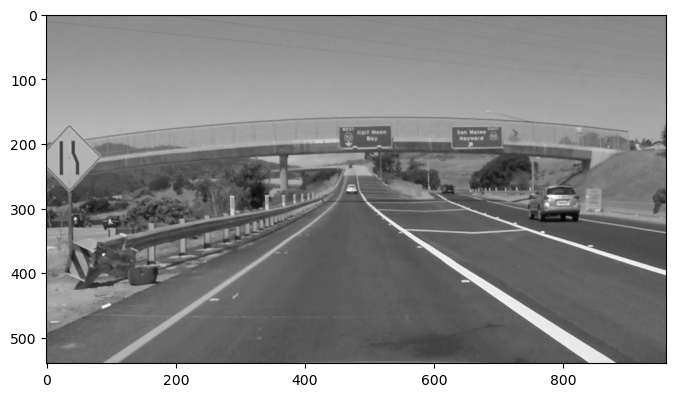

In [21]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(8,6), dpi=100)
plt.imshow(gray_image, cmap='gray')

## Canny Edge Detection
    edges = cv2.Canny(gray_image, low_threshold, high_threshold)

    We apply Canny to gray-scaled image. The output will be another image called "edges".
    "low_threshold" and "high_threshold" are the thresholds for edge detection

    The algorithm will firsly find the strong edges (strong gradients) which pixels are above the high_threshold.
    Then, the algorithm will reject the pixels which are below low_threshold.

    Next, the pixels which appeared to be between low and high thresholds will be included as long as they are connected to strong edges.
    The output "edges" is a binary image with pixels tracing out the detected edges and black everywhere else. 
    More details there: https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html
    
    What should be the range of thresholds values? 
    As the gray-scaled image is represented by an 8-bit image, each pixel can have 2^8 of possible values -> <0, 255>
    This range means that the derivatives (which are esencialy the valeu-differences from pixel to pixel) will be on the scale of 10s or 100s
    Therefore, the reasonable range would also be in the 10s or 100s. 


    What is intersting though, John Canny recommends himself the ratio of low to high thresholds to be around 1:2 or 1:3.
    Why? I have no idea yet.  
    

## Gaussian smoothing
    We will also apply Gaussian smoothing before running Canny algorithm. 
    This will allow to reduce the noise and fake gradients by averaging the neighbouring pixels. 
    More info there: https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#gaussianblur


## Wait a minute: https://www.youtube.com/watch?v=6gLngFssI0s
    cv2.Canny() actually applies Gausian smoothing internaly!
    We include it there, because one can get a different result by applying further smoothing (and this is not a changable parameter in Canny())

    One can choose the "kernel_size" for Gaussian smoothing to any ODD number.
    The larger kernel_size is, the bigger is the area of smoothing / averaging. 
    In this example, we set it to 5

    
    

    

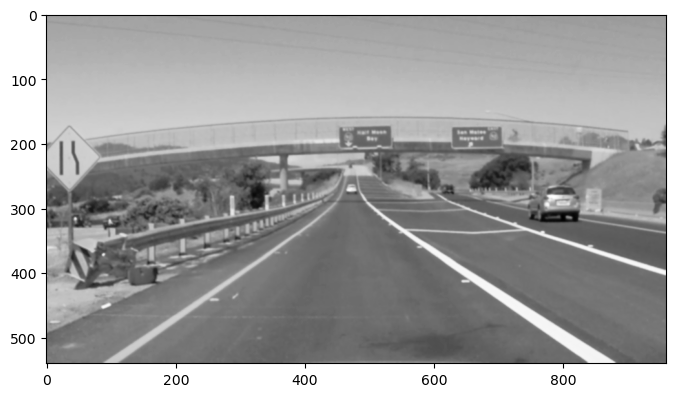

In [34]:
### GAUSSIAN SMOOTHING
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)
plt.figure(figsize=(8,6), dpi=100)
plt.imshow(blur_gray, cmap='Greys_r')

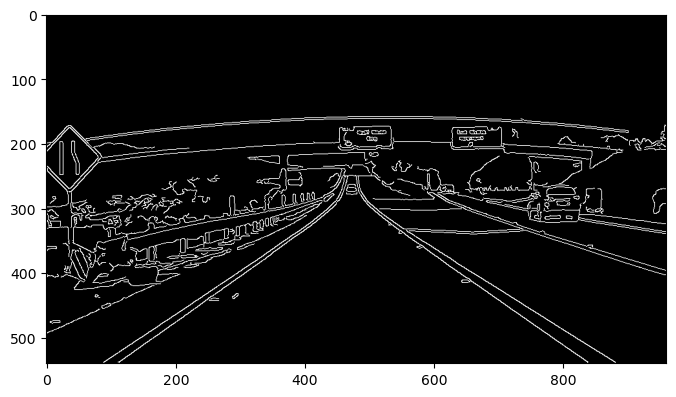

In [35]:
# CANNY EDGE DETECTION
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.figure(figsize=(8,6), dpi=100)
plt.imshow(edges, cmap='Greys_r')